In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 28 17:02:30 2020

@author: Johannes Heyn, more to come
"""

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

In [3]:
filename = "books_popularByDate.csv"
base_dir = "."
data_dir = "data"
fullpath = os.path.join(base_dir, data_dir, filename)

# Load and prepare data

In [4]:
df = pd.read_csv(fullpath)
print(df.head())
print(df.columns)
print(df.info())

                                                 url  \
0  https://www.goodreads.com/book/show/43263680-n...   
1  https://www.goodreads.com/book/show/43522576-i...   
2  https://www.goodreads.com/book/show/40899464-t...   
3  https://www.goodreads.com/book/show/45033931-c...   
4  https://www.goodreads.com/book/show/44600621-d...   

                                               title            author  \
0                                        Ninth House     Leigh Bardugo   
1                                   Imaginary Friend   Stephen Chbosky   
2                           The Things We Cannot Say      Kelly Rimmer   
3                                    Cilka's Journey  Heather   Morris   
4  Dear Girls: Intimate Tales, Untold Secrets, & ...          Ali Wong   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0        62473        11764        4.08      459.0  English   
1        16608         4178        3.50      705.0  English   
2        29088         3341  

In [5]:
df['pd_aux'] = pd.to_datetime(df['publish_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
date_time_now = datetime.datetime.now()
age = date_time_now - df['pd_aux']
age = age.apply(lambda x: x.days)
df['age'] = age
df = df.drop('pd_aux', axis = 1)
print(df.info)

<bound method DataFrame.info of                                                     url  \
0     https://www.goodreads.com/book/show/43263680-n...   
1     https://www.goodreads.com/book/show/43522576-i...   
2     https://www.goodreads.com/book/show/40899464-t...   
3     https://www.goodreads.com/book/show/45033931-c...   
4     https://www.goodreads.com/book/show/44600621-d...   
...                                                 ...   
1205  https://www.goodreads.com/book/show/42519313-n...   
1206  https://www.goodreads.com/book/show/43582376-t...   
1207  https://www.goodreads.com/book/show/43925876-t...   
1208  https://www.goodreads.com/book/show/43684727-t...   
1209  https://www.goodreads.com/book/show/48761584-c...   

                                                  title            author  \
0                                           Ninth House     Leigh Bardugo   
1                                      Imaginary Friend   Stephen Chbosky   
2                           

In [6]:
print(df[['publish_date', 'age']])


             publish_date    age
0     2019-10-08 00:00:00  233.0
1     2019-10-01 00:00:00  240.0
2     2019-10-17 00:00:00  224.0
3     2019-10-01 00:00:00  240.0
4     2019-10-15 00:00:00  226.0
...                   ...    ...
1205  2019-10-29 00:00:00  212.0
1206  2019-10-15 00:00:00  226.0
1207  2019-10-08 00:00:00  233.0
1208  2019-11-05 00:00:00  205.0
1209  2019-12-16 00:00:00  164.0

[1210 rows x 2 columns]


# Explore data
## Scatter plot: num_ratings vs age of book

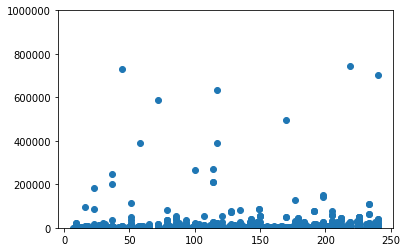

In [7]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], df['num_ratings'])
ax.set_ylim(0, 1000000)
plt.show()

## Scatter plot: num_reviews vs age of book

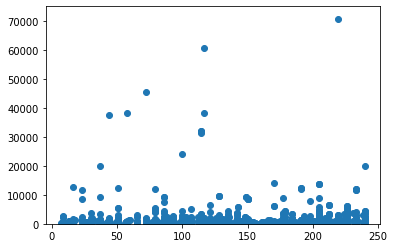

In [8]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], df['num_reviews'])
ax.set_ylim(0, 75000)
plt.show()

There's one remarkable outlier which has > 6x as many ratings as the second highest rated book. This book is "The Hunger Games" by Suzanne Collins and is just a later edition of the 2008 best-seller. For full entry, see below.

Unfortunately, there doesn't appear to be an obvious correlation between the age of a book and its number of reviews or ratings.

In [9]:
print(np.argmax(df['num_ratings']))
print(df.loc[883][:])

883
url                      https://www.goodreads.com/book/show/49494289-t...
title                                                     The Hunger Games
author                                                     Suzanne Collins
num_ratings                                                        6154931
num_reviews                                                         168431
avg_rating                                                            4.33
num_pages                                                              387
language                                                           English
publish_date                                           2019-12-19 00:00:00
genres                   ['Teen', 'Young Adult', 'Fantasy', 'Dystopia',...
awards                   ['Locus Award Nominee for Best Young Adult Boo...
characters               ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...
places                   ['District 12, Panem', 'Capitol, Panem', 'Panem']
series               